# ***Processing of data on Tag Cs-137 in stem woody biomass for forest sites***

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load biomass dataset
site_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Unit_site_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,214,095_2021,Pine,0,40,100.000000,9.173331,8.917017,26.454278,4000,...,0.009303,-4.677466,17.136062,2.841185,30,0.141667,0.14,0.009339,51.395430,246
1,472,060_2021,Robinia,5,39,42.287838,10.248202,20.161437,12.869754,1560,...,0.015607,-4.160037,6.328208,1.845017,21,10.249524,10.20,0.923954,33.428831,254
2,218,096_2021,Birch,2,35,100.000000,17.188036,20.614192,32.488588,1400,...,0.016439,-4.108084,0.800387,-0.222660,26,0.381538,0.39,0.044522,54.895591,247
3,430,051_2021,Pine,0,24,100.000000,22.133120,13.684873,36.940844,960,...,0.018700,-3.979215,4.799847,1.568584,31,0.552581,0.56,0.071300,17.571824,265
4,204,092_2021,Birch,2,41,100.000000,28.217794,27.000746,25.643676,410,...,0.019196,-3.953053,2.440077,0.892029,34,0.204412,0.20,0.017689,51.095388,246


In [5]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak/Red oak/Robinia
In "Origin_ID" column: "0" is nutural stand, "1" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,9.173331,8.917017,26.454278,n,0,20,9.173331,8.917017,26.454278,3,2,0.141667,51.395430,246,-4.677466,2.841185
1,Robinia,5,42.287838,10.248202,20.161437,12.869754,n,0,40,13.518680,22.091551,30.433701,3,3,10.249524,33.428831,254,-4.160037,1.845017
2,Birch,2,100.000000,17.188036,20.614192,32.488588,n,0,30,17.188036,20.614192,32.488588,2,3,0.381538,54.895591,247,-4.108084,-0.222660
3,Pine,0,100.000000,22.133120,13.684873,36.940844,n,0,20,22.133120,13.684873,36.940844,2,2,0.552581,17.571824,265,-3.979215,1.568584
4,Birch,2,100.000000,28.217794,27.000746,25.643676,a,1,57,28.217794,27.000746,25.643676,2,2,0.204412,51.095388,246,-3.953053,0.892029


# Pre-analysis of parameters

In [6]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   D_live_cm      209 non-null    float64
 10  H_live_m       209 non-null    float64
 11  G_live_m2_ha   209 non-null    float64
 12  F_Soil_ID      209 non-null    int64  
 13  M_Soil         209 non-null    int64  
 14  AEDR_mean      209 non-null    float64
 15  Distance_km    209 non-null    float64
 16  Azimuth        209 non-null    int64  
 17  ln_T_ag_Cs     209 non-null    float64
 18  ln_T_ag_Sr

In [7]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])['ln_T_ag_Cs', 'ln_T_ag_Sr'].describe()

/tmp/ipykernel_13510/2351458816.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Species","Origin"])['ln_T_ag_Cs', 'ln_T_ag_Sr'].describe()


ln_T_ag_Cs                                                    \
                    count      mean       std       min       25%       50%   
Species Origin                                                                
Alder   n            13.0 -0.621091  1.079748 -2.054670 -1.409349 -0.890892   
Aspen   n             9.0 -0.930356  1.335868 -2.444532 -1.853749 -1.029875   
Birch   a             8.0 -1.368259  1.159050 -3.953053 -1.514361 -0.852832   
        n            37.0 -0.974789  1.208183 -4.108084 -1.510900 -0.731341   
Oak     a             4.0  0.459802  0.941560 -0.873043  0.264561  0.685171   
        n             3.0 -0.696460  1.273862 -1.788996 -1.396061 -1.003126   
Pine    a            79.0 -0.144123  1.041337 -3.061180 -0.727265  0.206989   
        n            51.0 -0.987805  1.466318 -4.677466 -2.436234 -0.539482   
Red oak a             3.0 -0.579268  1.040146 -1.253902 -1.178204 -1.102506   
Robinia n             1.0 -4.160037       NaN -4.160037 -4.160037 -4.160037   
Spruce  a             1.0 -2.405881       NaN -2.405881 -2.405881 -2.405881   

                                   ln_T_ag_Sr                                \
                     75%       max      count      mean       std       min   
Species Origin                                                                
Alder   n       0.599227  1.107047       13.0  1.114066  0.639805 -0.169130   
Aspen   n      -0.638032  1.550281        9.0  2.833696  0.588208  1.974979   
Birch   a      -0.709916 -0.491440        8.0  2.786797  0.988082  0.892029   
        n      -0.121966  1.534340       37.0  2.280120  0.815141 -0.222660   
Oak     a       0.880412  1.341910        4.0  1.587438  1.180045  0.746804   
        n      -0.150191  0.702743        3.0  1.267692  0.632918  0.552561   
Pine    a       0.546915  1.651960       79.0  2.593975  0.845816 -0.113856   
        n       0.294468  1.198582       51.0  2.196393  0.947430  0.391017   
Red oak a      -0.241951  0.618604        3.0  2.351417  0.608020  1.649582   
Robinia n      -4.160037 -4.160037        1.0  1.845017       NaN  1.845017   
Spruce  a      -2.405881 -2.405881        1.0  1.807111       NaN  1.807111   

                                                        
                     25%       50%       75%       max  
Species Origin                                          
Alder   n       0.519859  1.340031  1.537968  1.797310  
Aspen   n       2.415378  2.710312  3.171806  3.759708  
Birch   a       2.550472  2.901584  3.129783  4.317885  
        n       2.002500  2.420262  2.634974  4.658771  
Oak     a       0.947736  1.136723  1.776425  3.329504  
        n       1.023670  1.494779  1.625258  1.755738  
Pine    a       2.135296  2.743032  3.102508  4.114105  
        n       1.612218  1.988582  3.155912  3.895456  
Red oak a       2.167897  2.686212  2.702334  2.718456  
Robinia n       1.845017  1.845017  1.845017  1.845017  
Spruce  a       1.807111  1.807111  1.807111  1.807111

In [9]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["ln_T_ag_Cs"], inplace=True) # IMPOTANT - input name of column
print(select)

     Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0       Pine           0     100.000000   9.173331   8.917017  26.454278   
1    Robinia           5      42.287838  10.248202  20.161437  12.869754   
2      Birch           2     100.000000  17.188036  20.614192  32.488588   
3       Pine           0     100.000000  22.133120  13.684873  36.940844   
4      Birch           2     100.000000  28.217794  27.000746  25.643676   
..       ...         ...            ...        ...        ...        ...   
204     Pine           0     100.000000  13.411189  13.346519  28.256274   
205    Birch           2      28.448276   1.914854   4.359681   0.259356   
206    Aspen           4      99.930119  11.401754  14.676282  17.972410   
207     Pine           0      96.284658  16.557714  17.797635  32.733666   
208     Pine           0     100.000000  13.427365  16.722719  48.177280   

    Origin  Origin_ID  A_year  D_live_cm   H_live_m  G_live_m2_ha  F_Soil_ID  \
0      

In [10]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,17.555614,16.999369,31.436810,1.918660,2.220096,2.526858,14.640059,174.296651,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,8.470174,6.783414,15.470759,0.634039,0.692944,4.756383,12.363729,99.912885,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.874874,2.704460,0.656684,1.000000,0.000000,0.110000,3.998568,9.000000,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,12.307179,12.193980,20.938452,2.000000,2.000000,0.460000,6.562497,56.000000,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,16.780740,17.365162,31.800484,2.000000,2.000000,0.756000,9.203749,189.000000,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,22.023624,21.604236,43.193896,2.000000,3.000000,2.401667,20.865459,261.000000,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,41.664506,33.436497,71.679126,3.000000,4.000000,36.591739,57.286577,342.000000,1.651960,4.658771


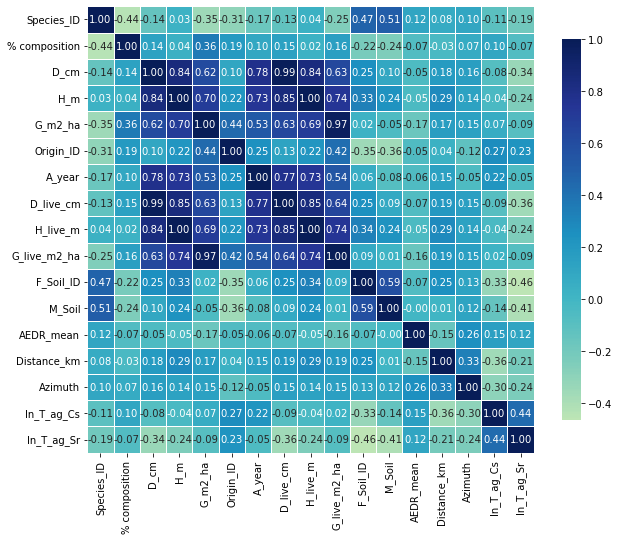

In [11]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [12]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','D_cm', 'H_m', 'G_m2_ha', 'A_year',
                                    'Origin_ID', 'F_Soil_ID', 'M_Soil'])
y = pd.DataFrame(select, columns= ['ln_T_ag_Cs'])

In [13]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value = np.random.normal(10, 2, size=count)
    X['Random_col'] = norm_value
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [14]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,Origin_ID,F_Soil_ID,M_Soil
0,0,9.173331,8.917017,26.454278,20,0,3,2
1,5,10.248202,20.161437,12.869754,40,0,3,3
2,2,17.188036,20.614192,32.488588,30,0,2,3
3,0,22.133120,13.684873,36.940844,20,0,2,2
4,2,28.217794,27.000746,25.643676,57,1,2,2


In [15]:
# Columns in "y" data collections
y.head()

,ln_T_ag_Cs
0,-4.677466
1,-4.160037
2,-4.108084
3,-3.979215
4,-3.953053


# Create first XGBoost model for estimate varibiality of output stats

In [16]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [17]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [18]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [19]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.12730710385832822, 0.1480170256704253, 0.13683820406673786]
    Mean: 0.137
    Std: 0.008

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.30833308 1.13086976 1.12989393]
    Mean: 1.190
    Std: 0.084

 --------------------
Mean absolute error (MAE): 

    Scores: [1.0227924912328146, 0.8406032662031389, 0.9720830456334072]
    Mean: 0.945
    Std: 0.077

 --------------------


# Find optimal hyperparameters for XGBoost model

In [20]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [22]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=5000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model with rank: 1
Mean validation score: -17.087 (std: 6.757)
Parameters: {'colsample_bytree': 0.7042028910152139, 'gamma': 0.131144588945935, 'learning_rate': 0.14899377812267037, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.3269126599094067}



In [23]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.54722047, 0.40378256, 0.2149724 ]), 'std_fit_time': array([0.10678138, 0.02005938, 0.02497771]), 'mean_score_time': array([0.01081128, 0.0093143 , 0.01168032]), 'std_score_time': array([0.00137013, 0.00093519, 0.00225988]), 'param_colsample_bytree': masked_array(data=[0.7869821061258238, 0.5942925529584822,
                   0.7042028910152139],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.37410231764335306, 0.22370846745123324,
                   0.131144588945935],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1405569507177254, 0.19015085112098157,
                   0.14899377812267037],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 3, 4],
             mask=[False, False, False],
       fill_value='?',


In [24]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7042028910152139
Gamma: 0.131144588945935
Learning_rate: 0.14899377812267037
Max_depth: 4
N_estimators: 50
Subsample: 0.3269126599094067


# Creating a basic XGBoost model

In [25]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [30]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7042028910152139, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.131144588945935, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.14899377812267037, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [31]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.55239	validation_1-rmse:1.65137
[1]	validation_0-rmse:1.41587	validation_1-rmse:1.56952
[2]	validation_0-rmse:1.28464	validation_1-rmse:1.50167
[3]	validation_0-rmse:1.19932	validation_1-rmse:1.46005
[4]	validation_0-rmse:1.14091	validation_1-rmse:1.39107
[5]	validation_0-rmse:1.07375	validation_1-rmse:1.36010
[6]	validation_0-rmse:1.01811	validation_1-rmse:1.33630
[7]	validation_0-rmse:0.98141	validation_1-rmse:1.32532
[8]	validation_0-rmse:0.94606	validation_1-rmse:1.31412
[9]	validation_0-rmse:0.91656	validation_1-rmse:1.28300
[10]	validation_0-rmse:0.87898	validation_1-rmse:1.28036
[11]	validation_0-rmse:0.84615	validation_1-rmse:1.27109


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.83258	validation_1-rmse:1.23965
[13]	validation_0-rmse:0.80092	validation_1-rmse:1.22049
[14]	validation_0-rmse:0.78802	validation_1-rmse:1.21977
[15]	validation_0-rmse:0.78461	validation_1-rmse:1.22110
[16]	validation_0-rmse:0.75971	validation_1-rmse:1.21974
[17]	validation_0-rmse:0.75314	validation_1-rmse:1.23231
[18]	validation_0-rmse:0.73458	validation_1-rmse:1.23338
[19]	validation_0-rmse:0.72626	validation_1-rmse:1.23339
[20]	validation_0-rmse:0.71727	validation_1-rmse:1.24082
[21]	validation_0-rmse:0.71026	validation_1-rmse:1.23108
[22]	validation_0-rmse:0.69241	validation_1-rmse:1.21995
[23]	validation_0-rmse:0.67315	validation_1-rmse:1.22010
[24]	validation_0-rmse:0.66473	validation_1-rmse:1.21615
[25]	validation_0-rmse:0.65556	validation_1-rmse:1.21476
[26]	validation_0-rmse:0.64692	validation_1-rmse:1.22783
[27]	validation_0-rmse:0.63492	validation_1-rmse:1.24256
[28]	validation_0-rmse:0.63351	validation_1-rmse:1.24866
[29]	validation_0-rmse:0.61777	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [32]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 25


In [33]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

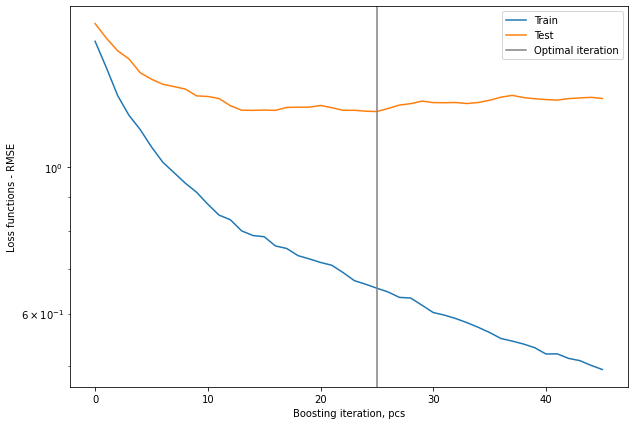

In [34]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

# Test (validation) observations

In [35]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -0.0
Relative bias(%):  2.08
RMSE: 1.2
Relative RMSE(%):  -1.803
MSE: 1.5
R square: 17.0%


In [36]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [38]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.554
a1: 0.210
R^2: 0.177
Uncertainty
a0: -0.55+/-0.09
a1: 0.21+/-0.06


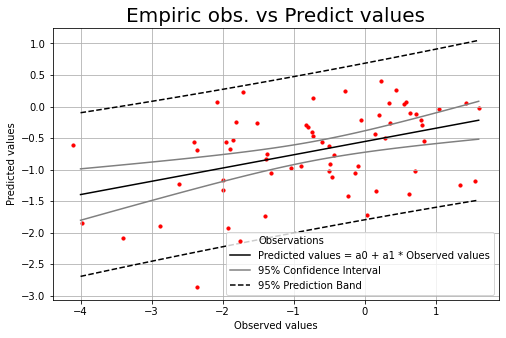

In [40]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# All observations

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


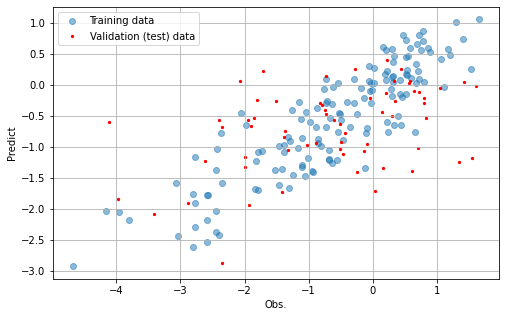

In [41]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.grid(True)
plt.legend(loc='best')

# Training sample

In [42]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred_train) # Double transformation
y_pred_train2 = conv_y_pred.values
y_train2 = y_train.values

# Intermediate results
n_sample = len(y_pred_train2)
main_sample = y_train.sum() / n_sample

# Calculation of bias
diff = y_pred_train2 - y_train2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_train, y_pred_train)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: 0.1
Relative bias(%):  -15.10
RMSE: 0.7
Relative RMSE(%):  -1.048
MSE: 0.4
R square: 73.1%


In [44]:
# Convert input data
x_train_conv = np.array(y_train)
x_train_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_train_convert[i] = float(x_train_conv[i])

x_plot = x_train_convert
y_plot = y_pred_train
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.179
a1: 0.611
R^2: 0.765
Uncertainty
a0: -0.18+/-0.04
a1: 0.611+/-0.028


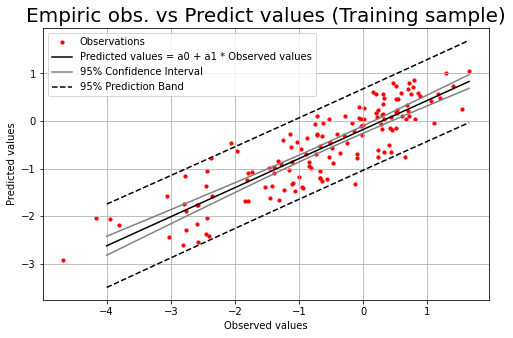

In [46]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values (Training sample)', fontsize=20, color="black")
plt.show()

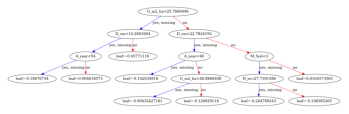

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

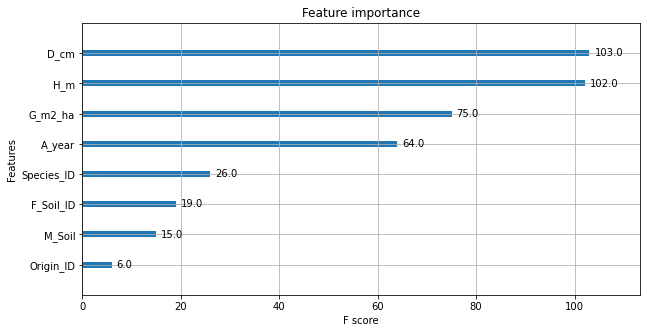

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

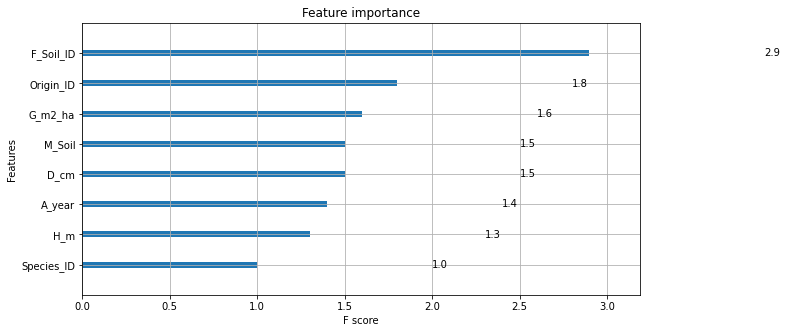

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

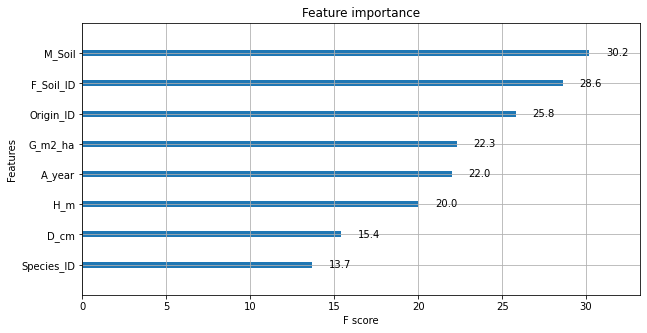

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [52]:
# Load SHAP`s library
import shap

In [53]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


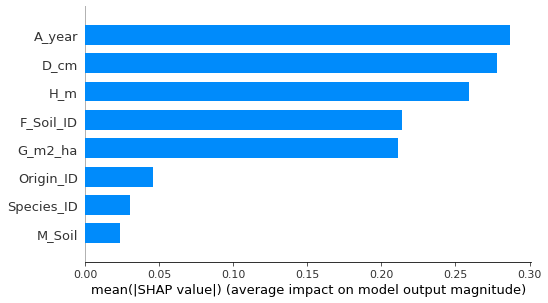

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)

# Save XGBoost model

In [ ]:
# Save to JSON
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in _wood/xgb_model_T_ag_Cs.json")
# Save to text format
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in _wood/xgb_model_T_ag_Cs.txt")